In [1]:
import LeNet5
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
batch_size = 256

# 데이터 전처리
# MNIST 데이터 가져오기
mnist_train = datasets.MNIST(root='../data/MNIST/train',
                             train=True,
                             transform=transforms.Compose([
                                 transforms.Resize((32, 32)),
                                 transforms.ToTensor(),
                                 transforms.Normalize(0.5, 0.5),
                             ]),
                             download=True)
mnist_test = datasets.MNIST(root='../data/MNIST/test',
                            train=False,
                            transform=transforms.Compose([
                                transforms.Resize((32, 32)),
                                transforms.ToTensor(),
                                transforms.Normalize(0.5, 0.5),
                            ]),
                            download=True)

# dataloader 만들기
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=True)

In [3]:
model = LeNet5.LeNet5().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 훈련
model.train()
train_loss_list = []
train_accuracy_list = []

epochs = 10
for epoch in range(epochs):
    train_loss = 0
    train_accuracy = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        # 순전파
        y_pred = model(data)
        loss = loss_fn(y_pred, target)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_accuracy += (torch.argmax(y_pred, dim=1) == target).sum().item()

    train_loss /= len(train_loader.dataset)
    train_loss *= 256
    train_loss_list.append(train_loss)

    train_accuracy /= len(train_loader.dataset)
    train_accuracy_list.append(train_accuracy)

    if epoch % 1 == 0:
        print('epoch : {}/{}, train_loss : {:.8f}, train_acc : {:.2f}'
              .format(epoch + 1, epochs, train_loss, train_accuracy))

epoch : 1/10, train_loss : 1.67806489, train_acc : 0.83
epoch : 2/10, train_loss : 1.52183892, train_acc : 0.95
epoch : 3/10, train_loss : 1.50058890, train_acc : 0.97
epoch : 4/10, train_loss : 1.49184472, train_acc : 0.98
epoch : 5/10, train_loss : 1.48636935, train_acc : 0.98
epoch : 6/10, train_loss : 1.48316035, train_acc : 0.98
epoch : 7/10, train_loss : 1.48098443, train_acc : 0.99
epoch : 8/10, train_loss : 1.47831944, train_acc : 0.99
epoch : 9/10, train_loss : 1.47685163, train_acc : 0.99
epoch : 10/10, train_loss : 1.47622492, train_acc : 0.99


In [4]:
# 모델 저장
torch.save(model, './lenet5.pt')

In [5]:
# 평가
acc = 0
with torch.no_grad():
    model.eval()
    for data, target in test_loader:
        # target = F.one_hot(target)

        data = data.to(device)
        target = target.to(device)

        y_pred = model(data)

        acc += (torch.argmax(y_pred, dim=1) == target).sum().item()

    acc /= len(test_loader.dataset)
print('accuracy: {:.4f}'.format(acc))

accuracy: 0.9864


label: 5 4 6 8 
predict: 5 4 6 8 


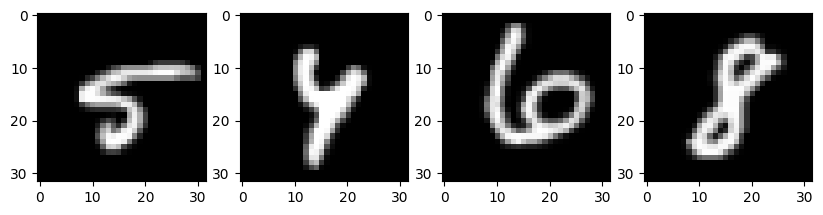

LeNet5(
  (C1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (tanh1): Tanh()
  (S2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (C3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (tanh2): Tanh()
  (S4): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (C5): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (tanh3): Tanh()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (F6): Linear(in_features=120, out_features=84, bias=True)
  (tanh4): Tanh()
  (OutputLayer): Linear(in_features=84, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [6]:
image, label = next(iter(test_loader))
label_str = ''
pred_label_str = ''
plt.figure(figsize=(10, 3))
for i in range(4):
    plt.subplot(1, 4, i + 1)

    img = image[i][0]
    plt.imshow(img, 'gray')
    y_pred = model(image.to(device))
    pred_label = torch.argmax(y_pred, dim=1)

    label_str += str(label[i].item()) + ' '
    pred_label_str += str(pred_label[i].item()) + ' '
print('label: {}\npredict: {}'.format(label_str, pred_label_str))
plt.show()

model.train()

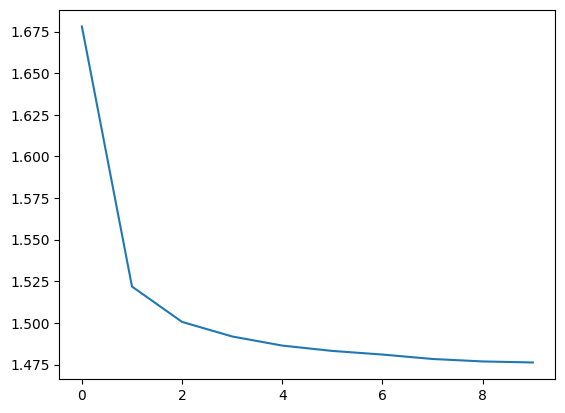

In [7]:
plt.plot(train_loss_list)
plt.show()